<a href="https://colab.research.google.com/github/Nischay-verma/Mid_course_ML/blob/main/ML_mid_course_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Name - Breast Cancer Detection using Classification


 **Project Type**    - Classification

 **Contribution**     - Individual

 **Name**             -  Nischay Verma

# **Project Summary -**

# **GitHub Link -**

GitHub Link: https://github.com/Nischay-verma/Mid_course_ML

# **1. Problem Statement**

# ***Let's Begin !***

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 2. Data Collection

## Load the Dataset from Sklearn


In [2]:
from sklearn.datasets import load_breast_cancer # load the dataset from sklearn
dataset = load_breast_cancer()
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [3]:
dataset.target # 0 = malignant, 1 = benign

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

## Converting Into DataFrame

In [4]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names) # create a dataframe from the data
df['target'] = dataset.target

In [5]:
df.head(10) # first 10 rows of the dataframe

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [6]:
df.info() # information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
# Dataset Rows & Columns count
num_rows, num_cols = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 569
Number of columns: 31


In [8]:
df.describe() # statistical measures of the data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [9]:
df.isnull().sum() # checking for null values

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [10]:
# distribution of target variable
malignant_count = df['target'].value_counts()[0]
benign_count = df['target'].value_counts()[1]

print("Malignant count:", malignant_count)
print("Benign count:", benign_count)


Malignant count: 212
Benign count: 357


# 3. Data Preprocessing

In [11]:
df.isnull().sum() # checking for missing  values

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

There is no null value in the dataset.


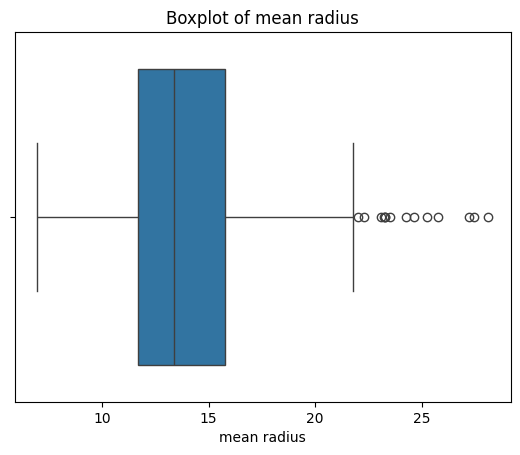

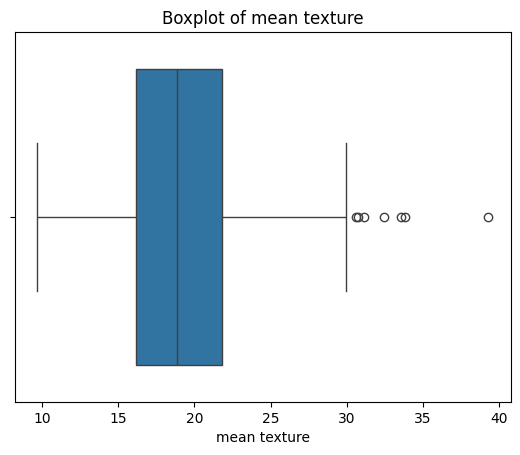

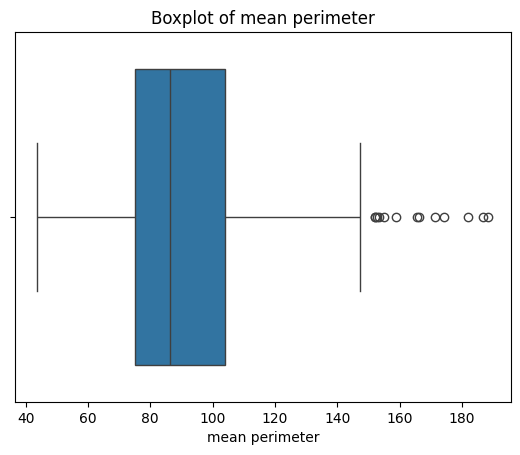

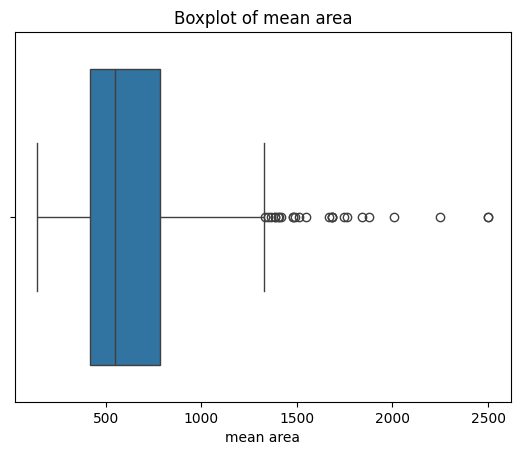

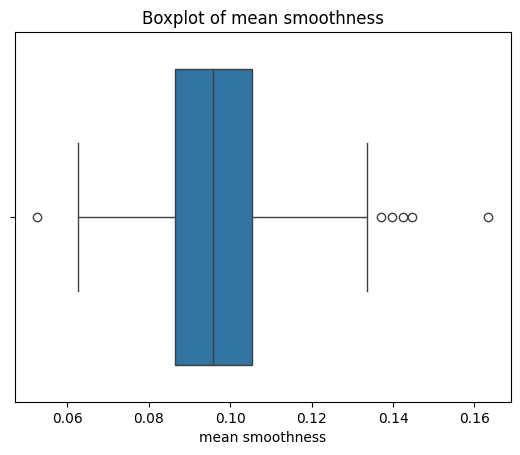

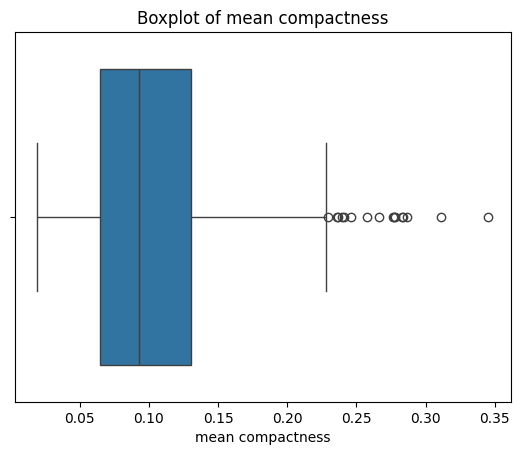

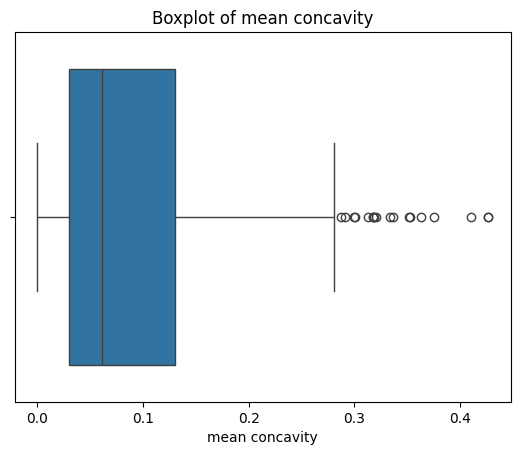

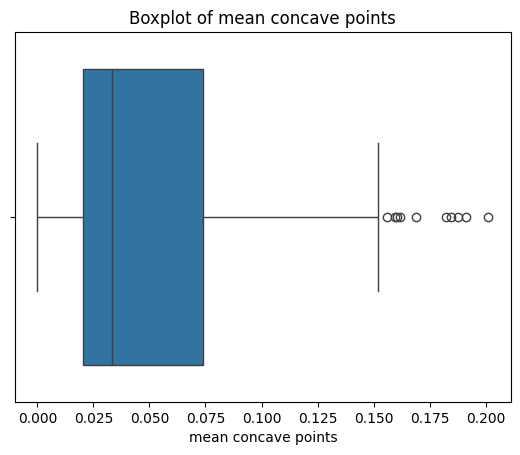

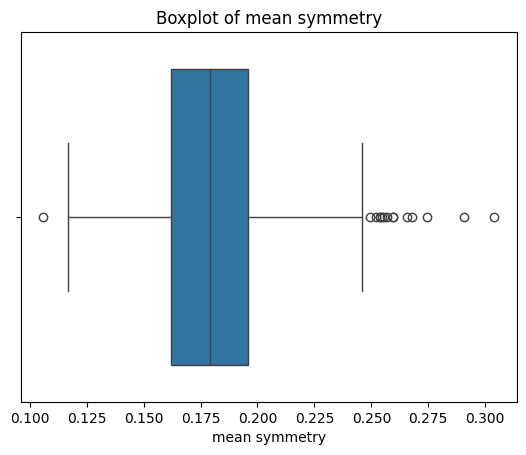

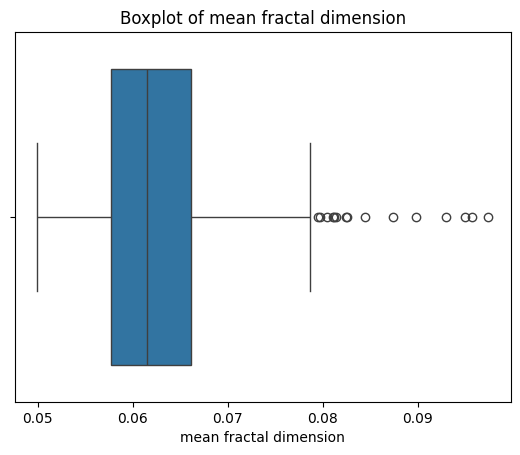

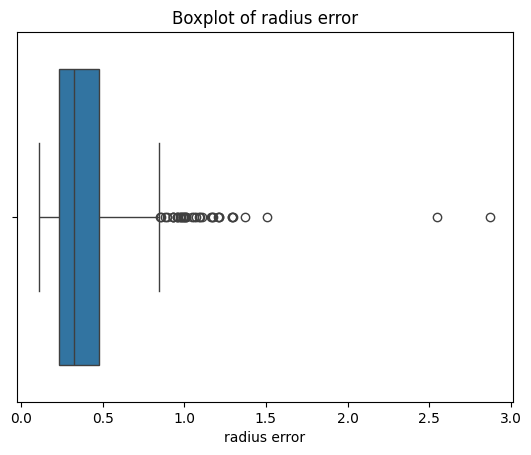

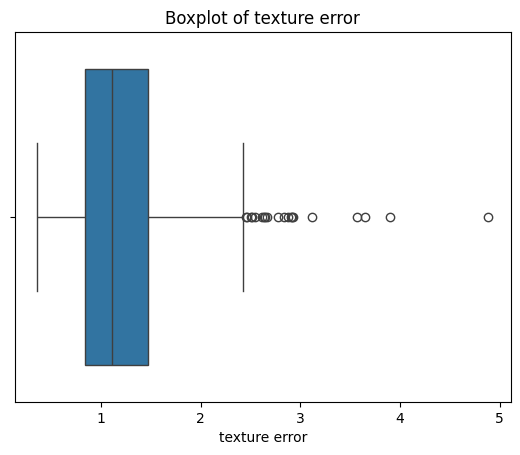

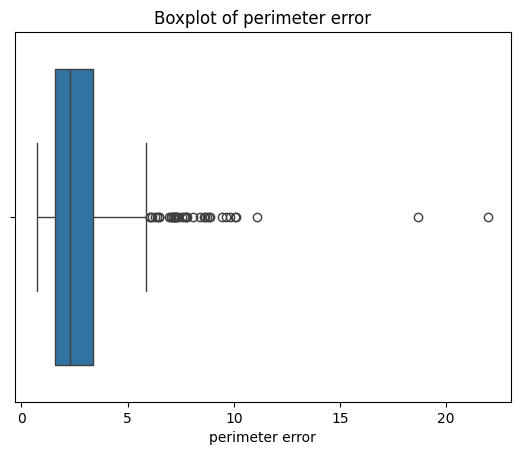

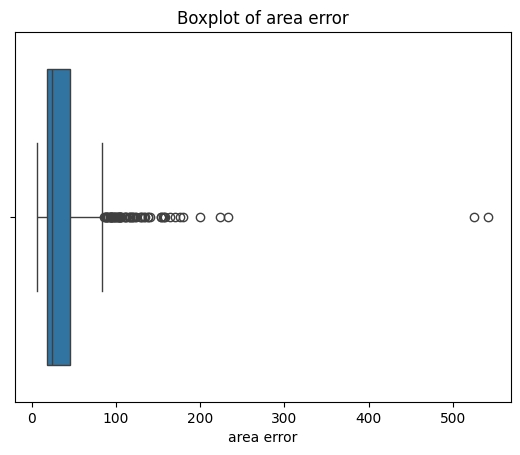

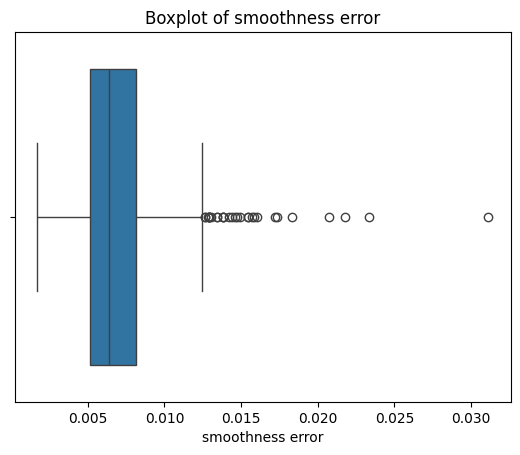

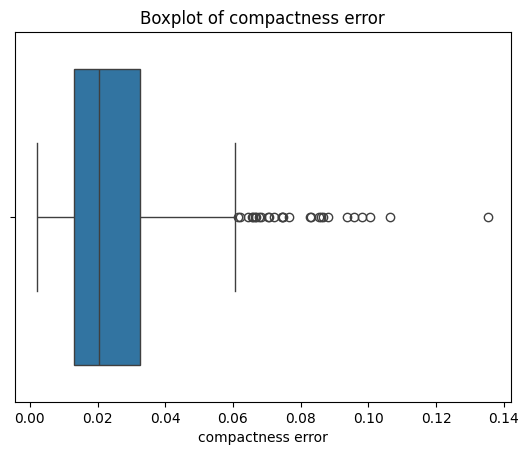

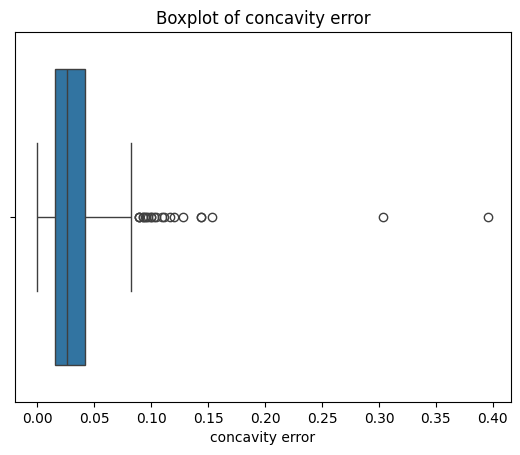

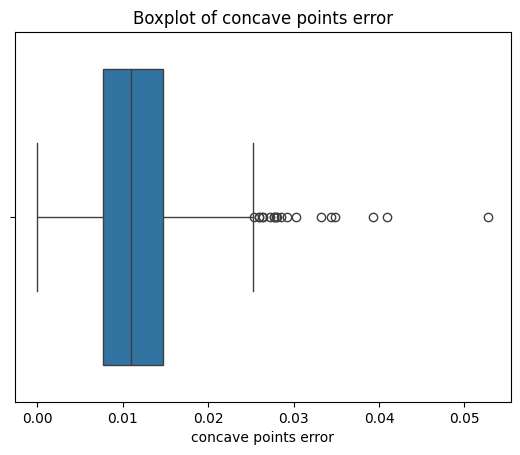

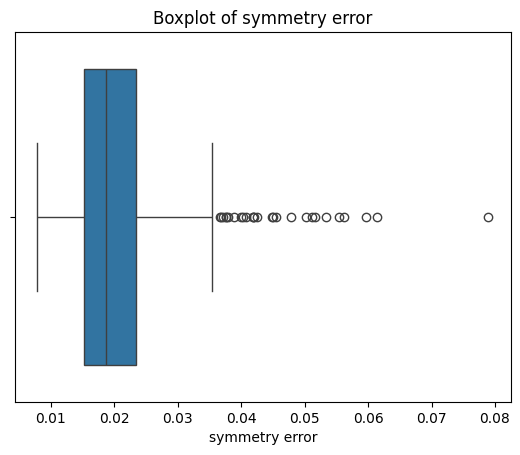

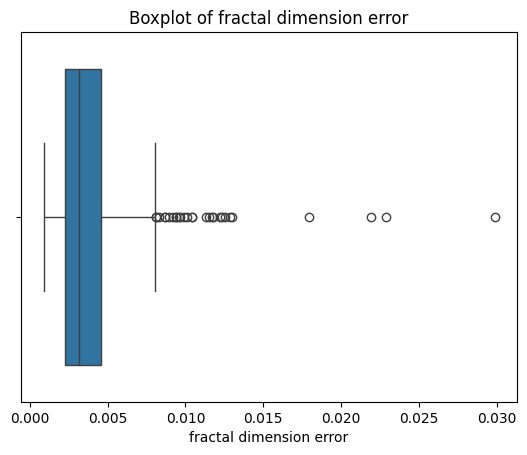

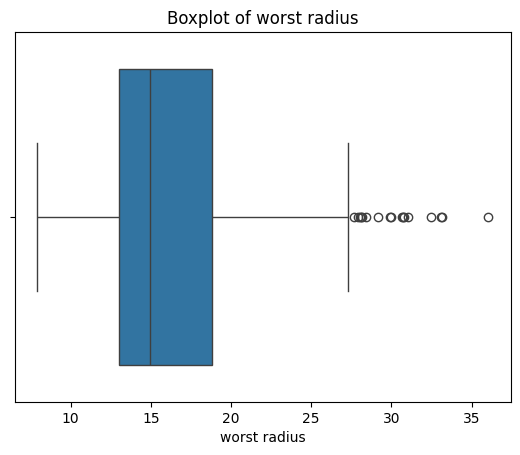

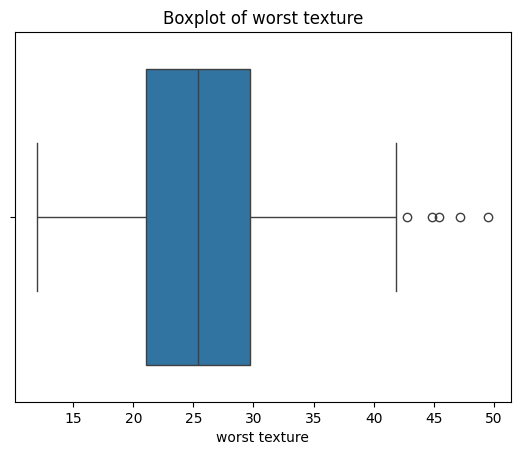

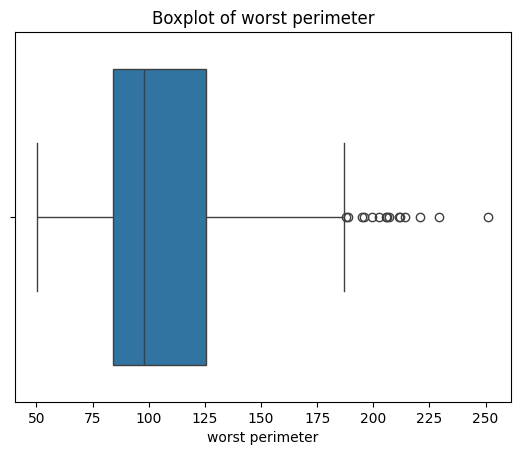

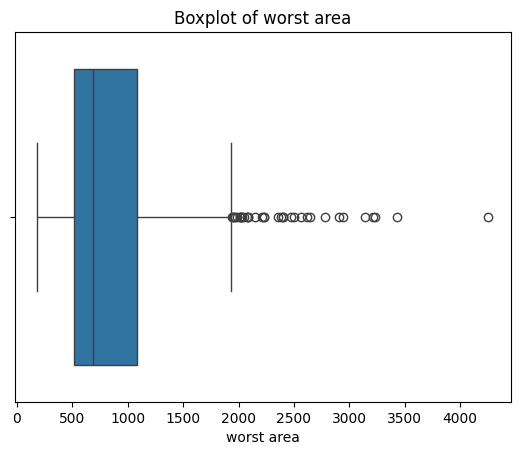

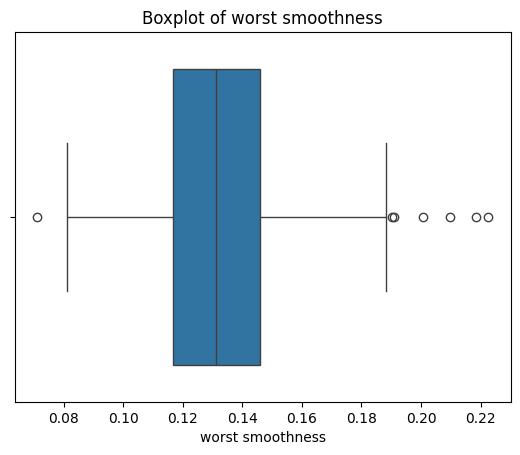

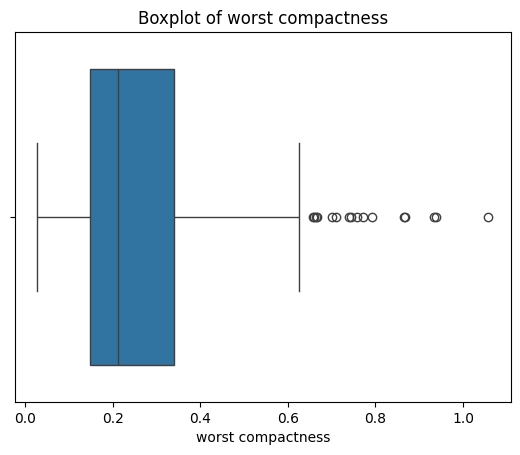

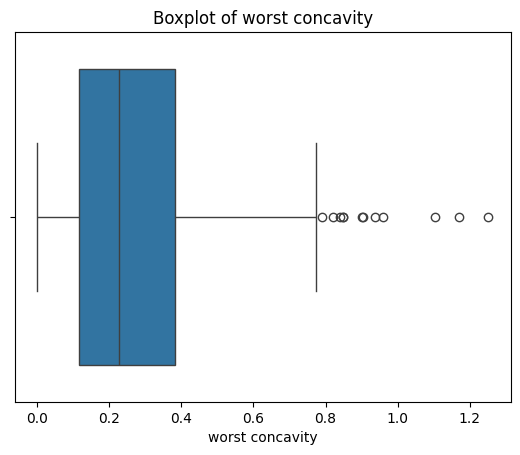

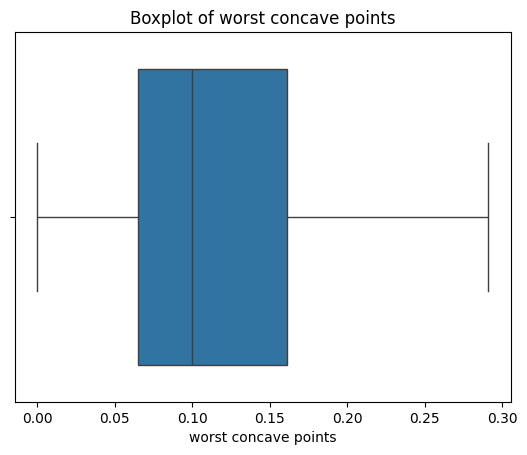

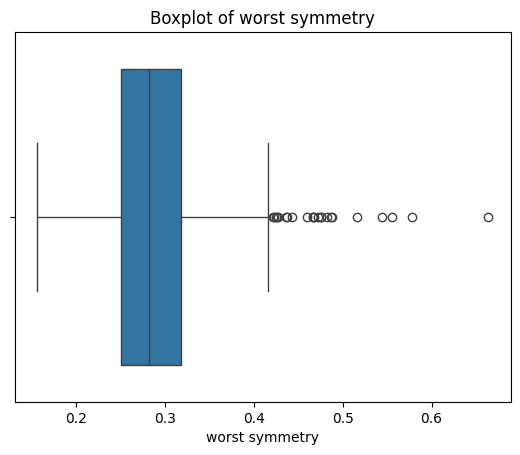

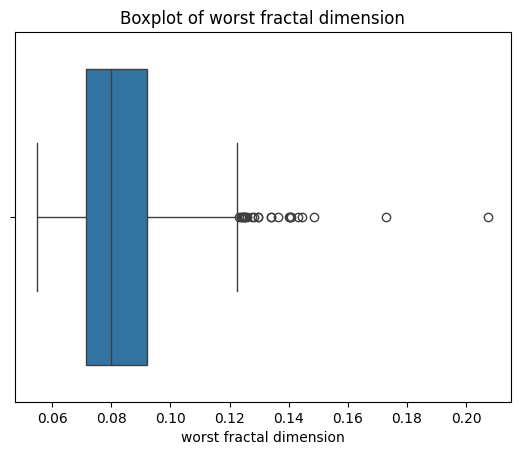

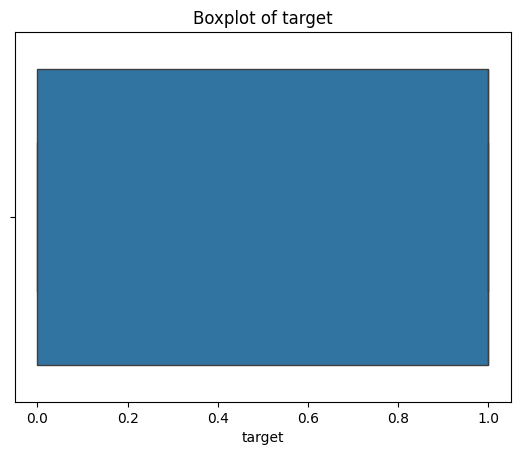

In [12]:
# Detect outliers using IQR
def detect_outliers_IQR(df, columns):
  for col in columns:
    # Calculate IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[~((df[col] >= lower_bound) & (df[col] <= upper_bound))]

    # Plot boxplot
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# List of columns
columns = df.columns

# Detect outliers and plot charts
detect_outliers_IQR(df, columns)


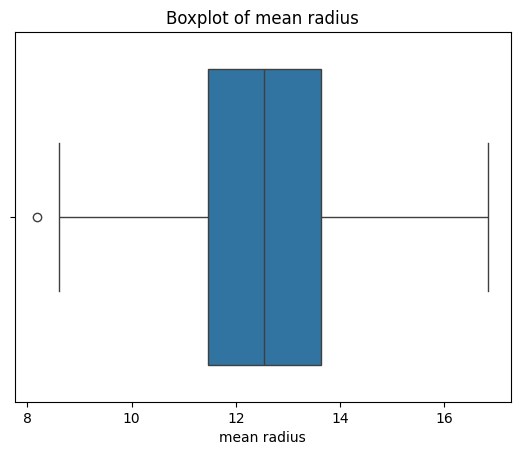

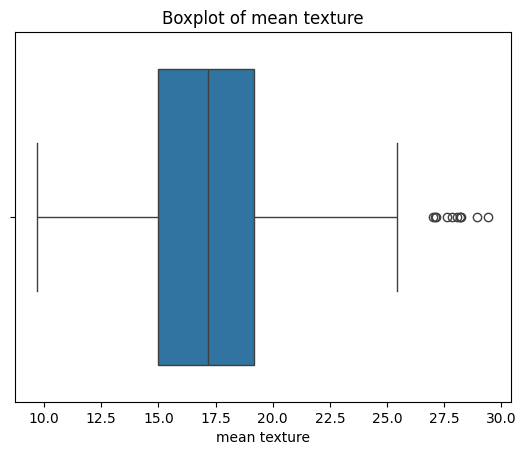

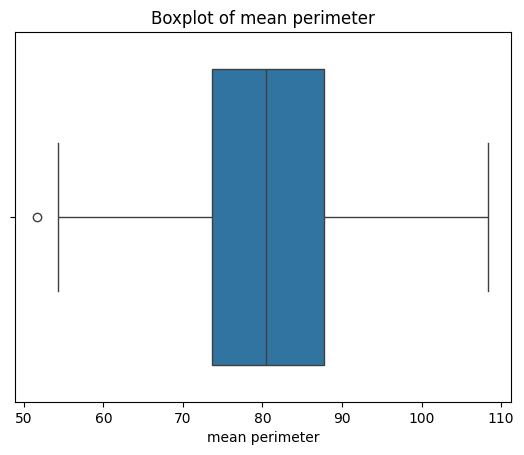

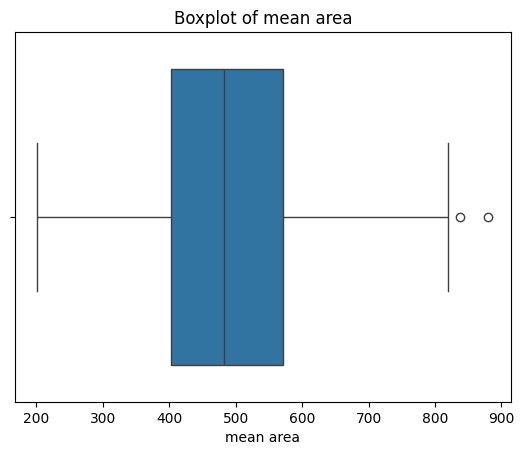

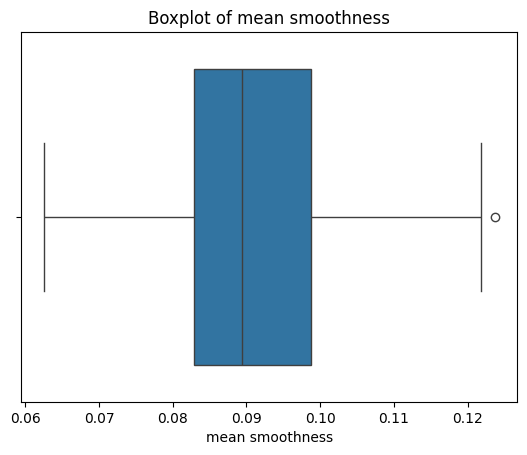

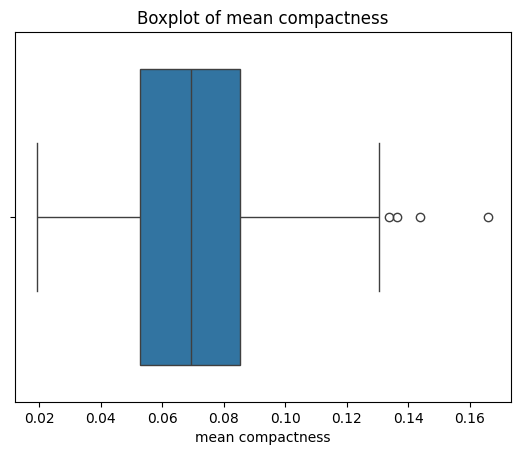

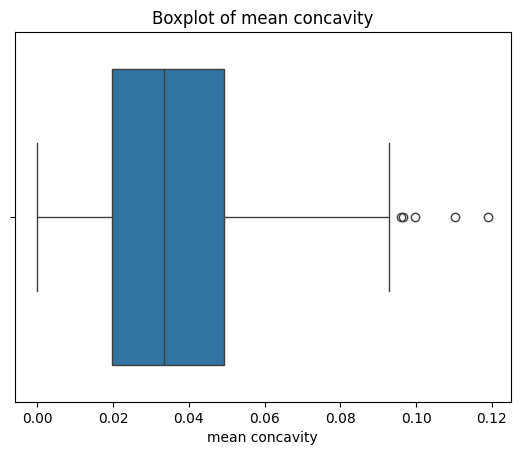

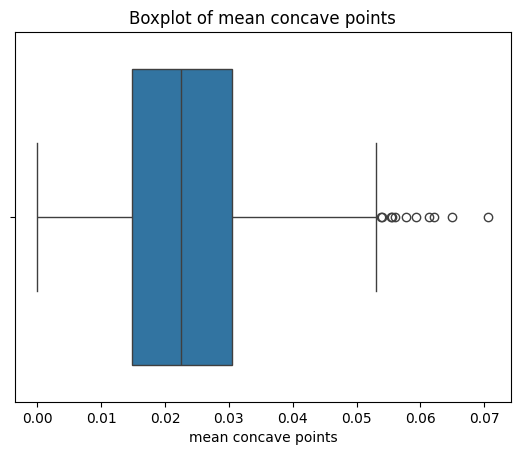

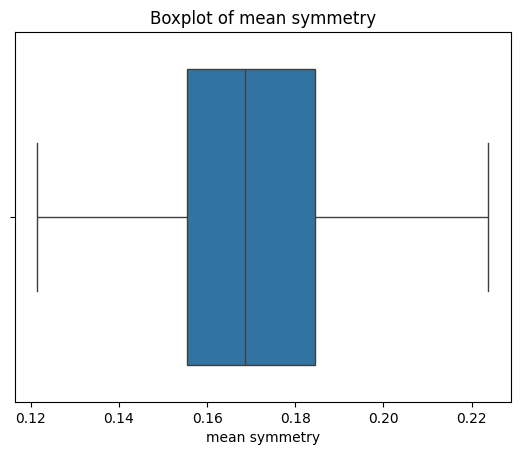

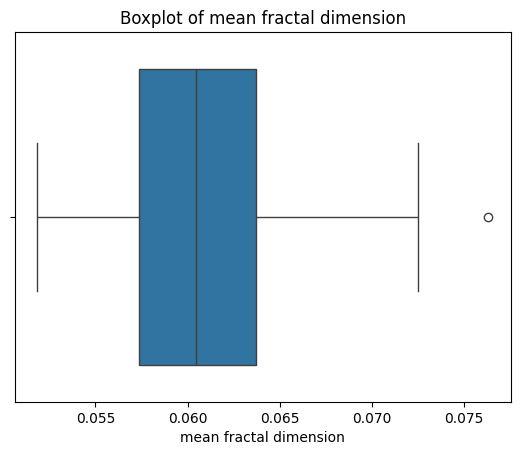

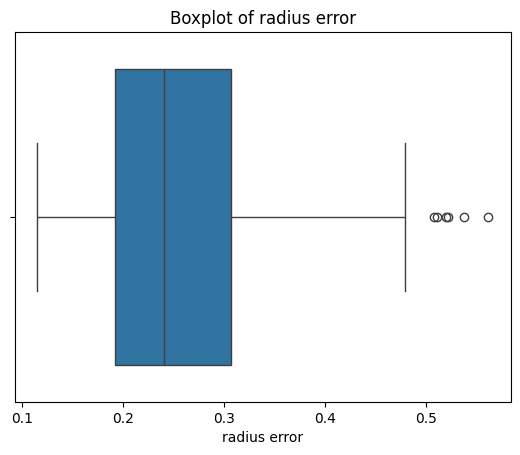

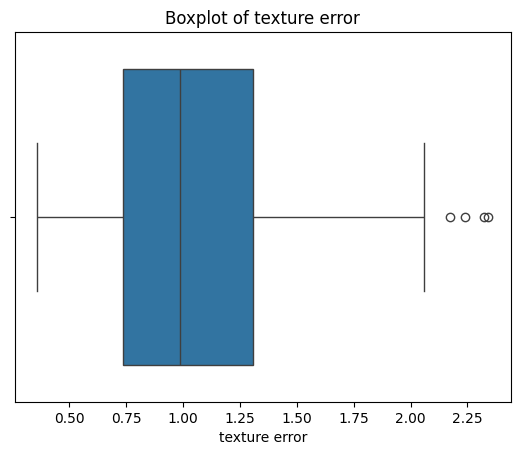

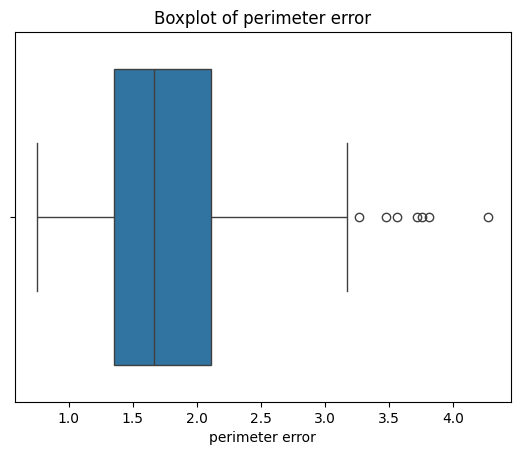

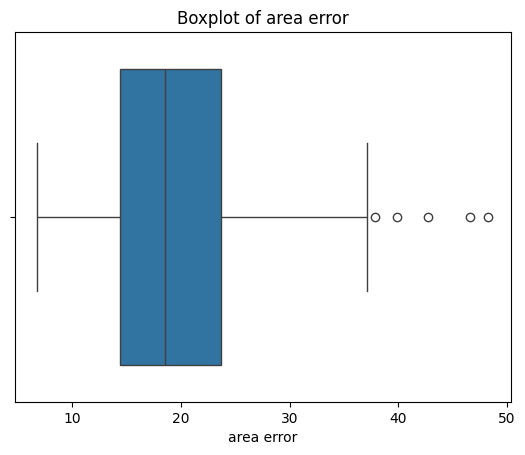

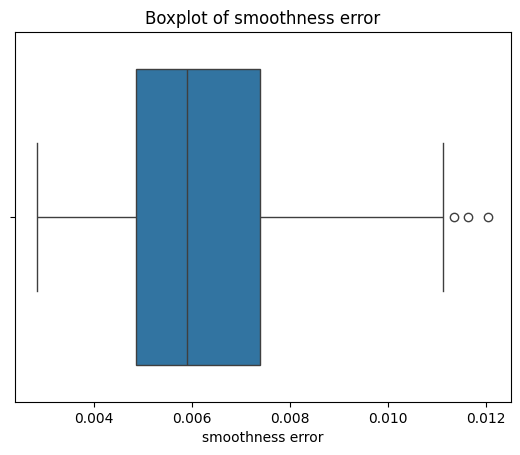

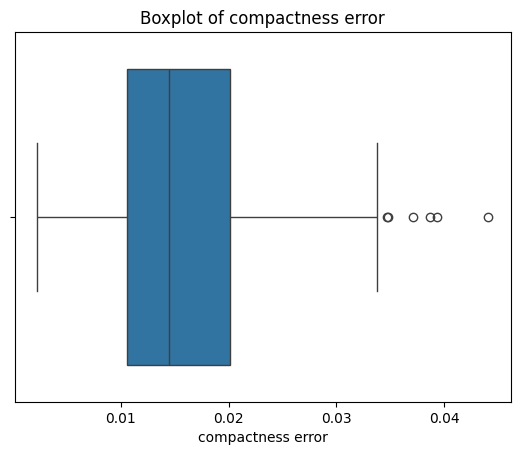

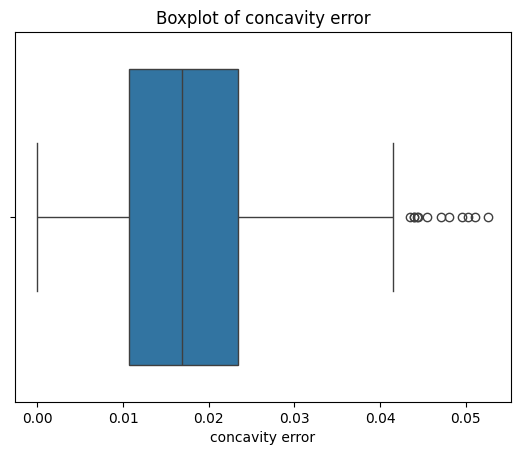

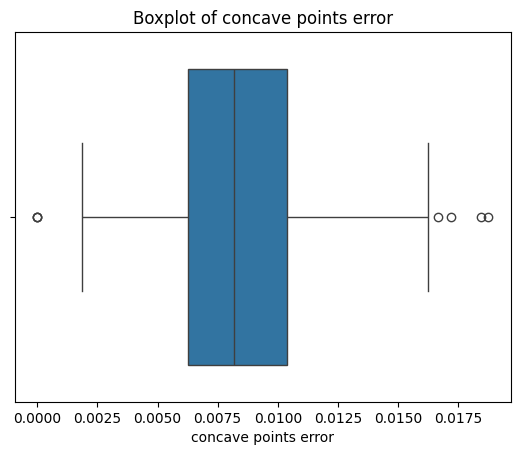

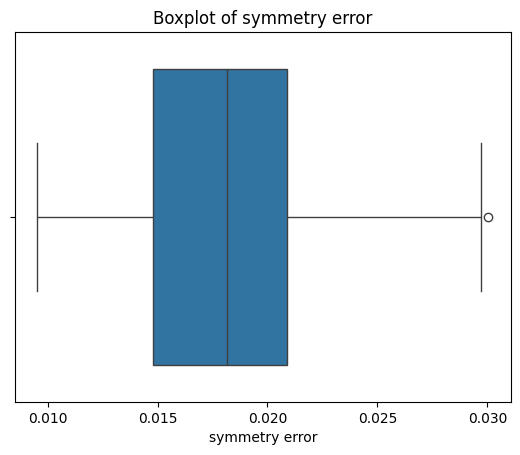

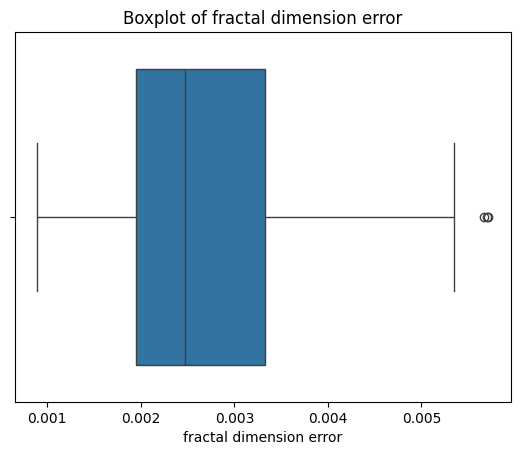

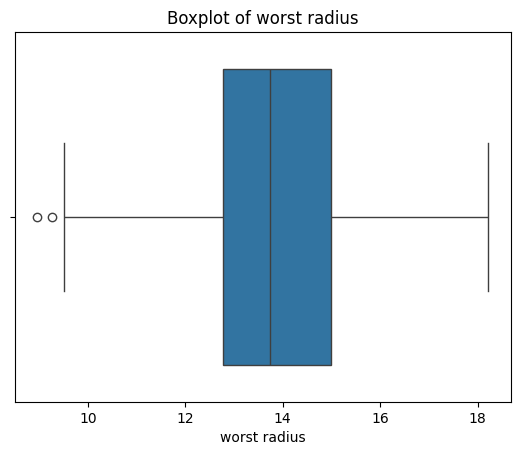

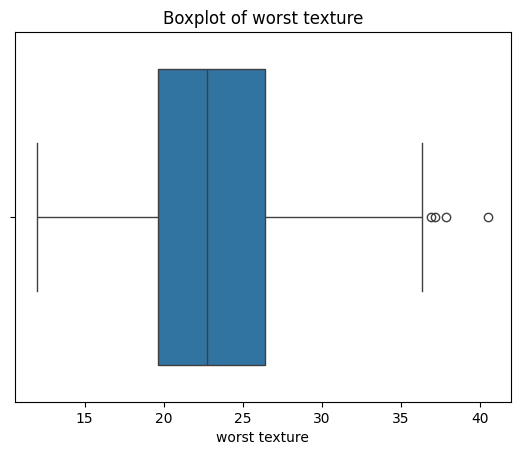

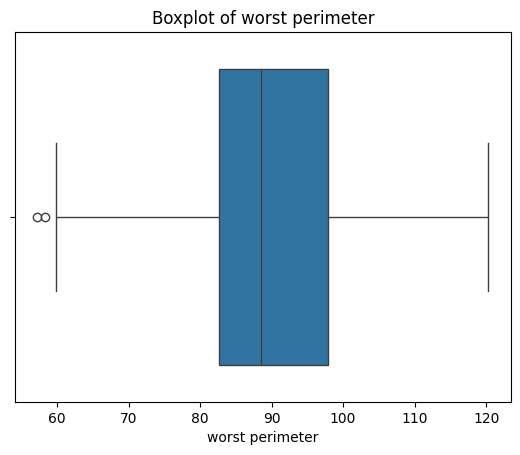

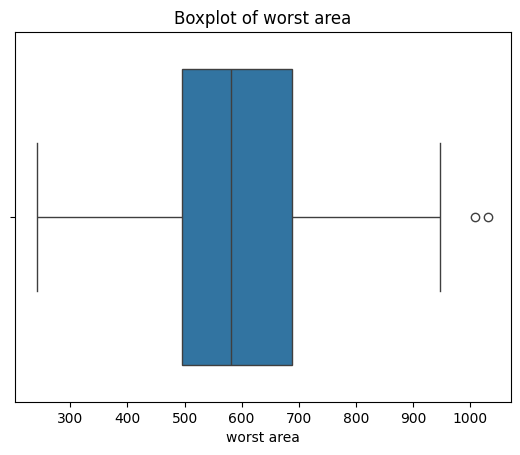

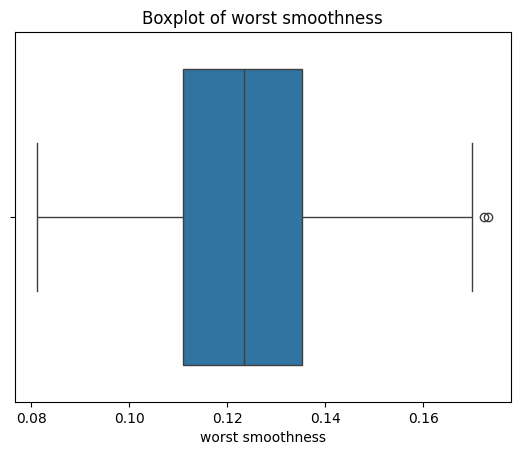

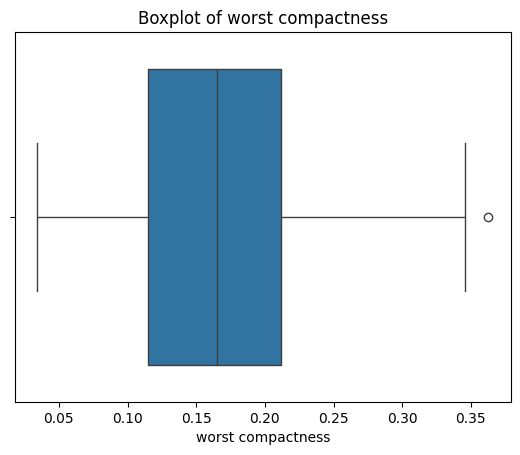

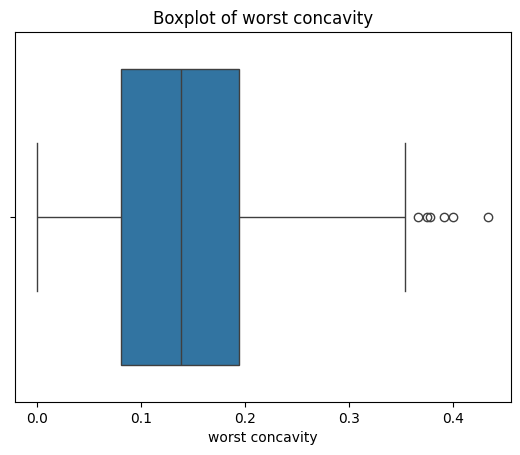

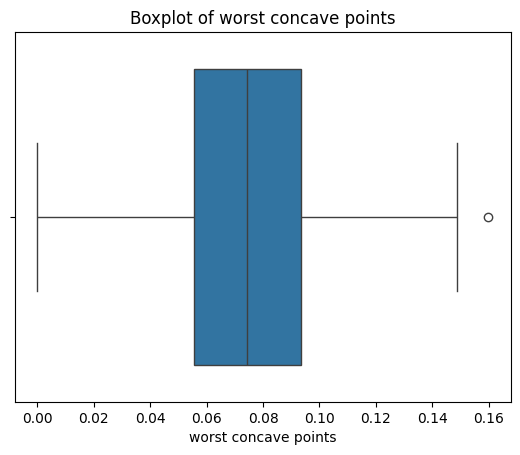

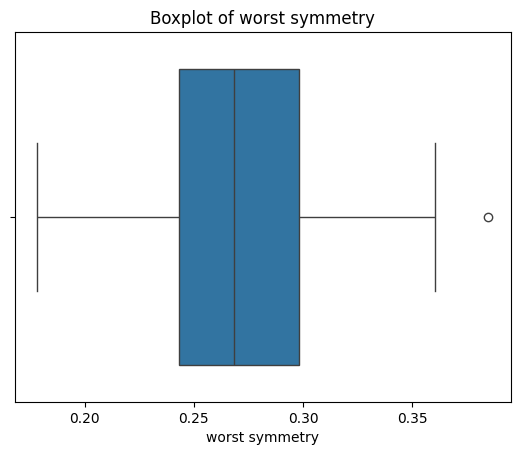

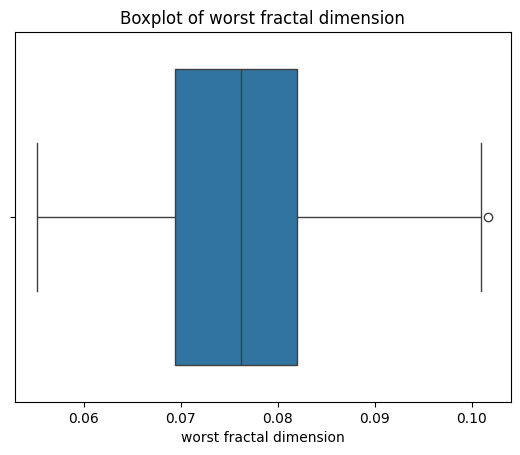

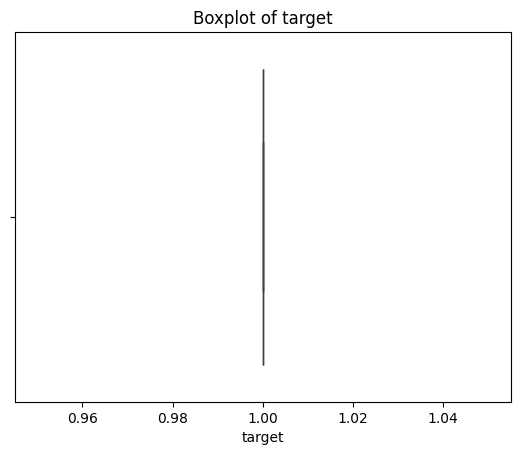

In [13]:
# Handling ouliers

def remove_outliers_IQR(df, columns):
  for col in columns:
    # Calculate IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[~((df[col] >= lower_bound) & (df[col] <= upper_bound))]

    # Remove outliers
    df = df.drop(outliers.index)

  # Plot boxplot after removing Outliers
  for col in columns:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# List of columns
columns = df.columns

# Remove outliers and plot charts
remove_outliers_IQR(df, columns)


In [14]:
df.describe() # statistical measures of the data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


What all manipulations have you done and insights you found?

**Ans:**

In the data preprocessing phase,
* there is no need to fill null values in the dataset beccause there is no null value available in the dataset.
* I used IQR method to identify the outliers and plot the boxplot to show the outliers and then i remove the outliers using IQR method and again plot the graph for each column.

# 4. Exploratory Data Analysis (EDA)

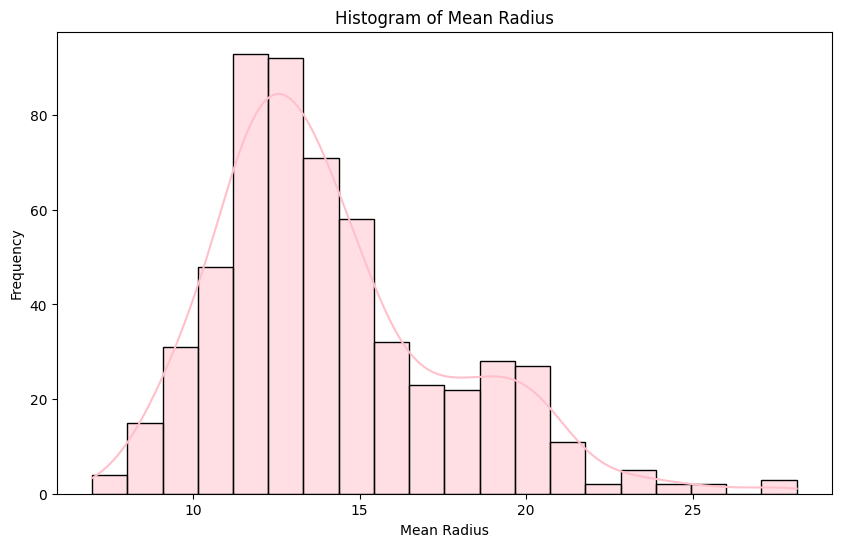

In [15]:
# Histogram for 'mean radius'
plt.figure(figsize=(10, 6))
sns.histplot(df['mean radius'], bins=20, kde=True, color='pink')
plt.title('Histogram of Mean Radius')
plt.xlabel('Mean Radius')
plt.ylabel('Frequency')
plt.show()

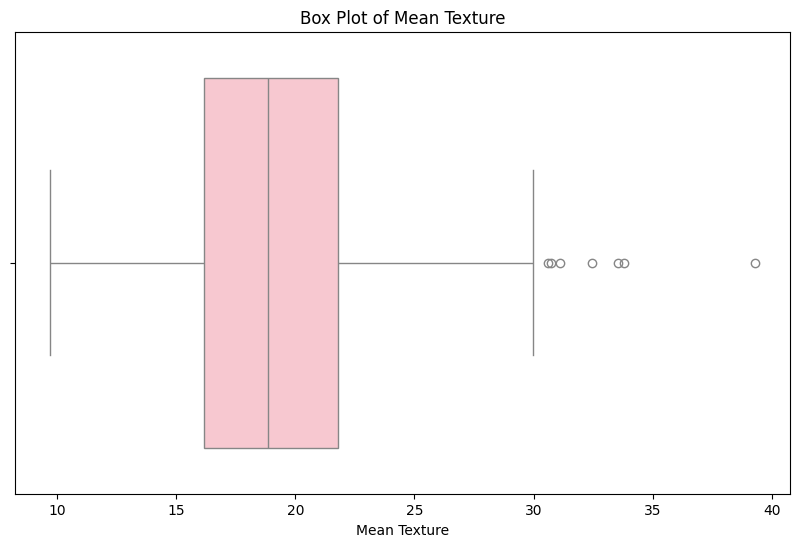

In [16]:
# Box plot for 'mean texture'
plt.figure(figsize=(10, 6))
sns.boxplot(x='mean texture', data=df, color = 'pink')
plt.title('Box Plot of Mean Texture')
plt.xlabel('Mean Texture')
plt.show()

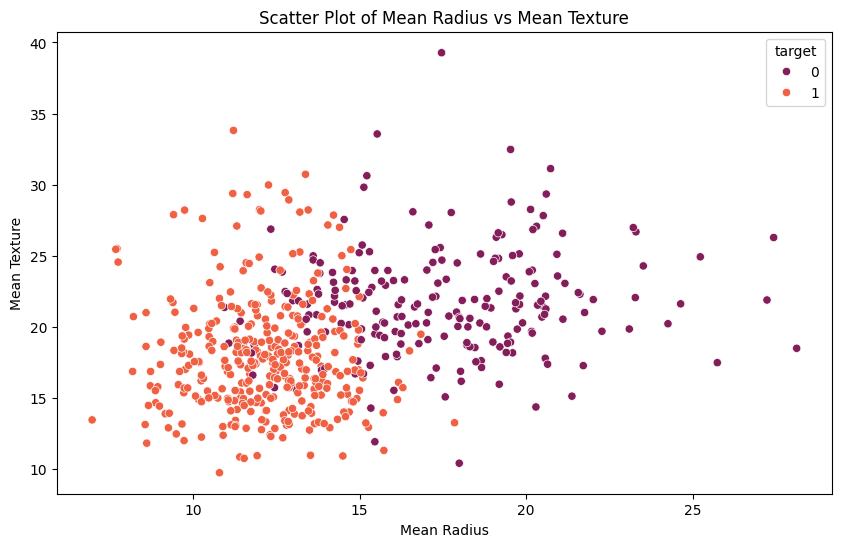

In [17]:
# Scatter plot between 'mean radius' and 'mean texture'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mean radius', y='mean texture', hue='target', data=df, palette=  'rocket')
plt.title('Scatter Plot of Mean Radius vs Mean Texture')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.show()

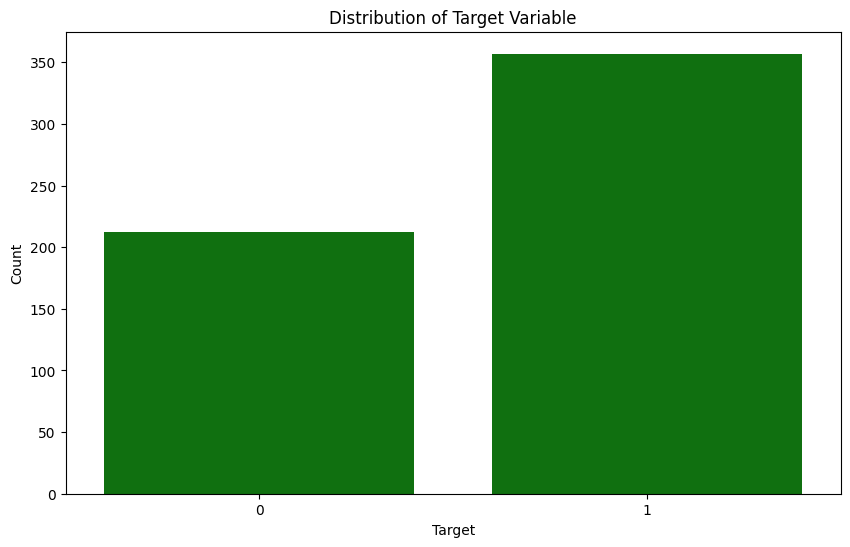

In [18]:
# Bar chart for target variable distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=df, color= 'green')
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

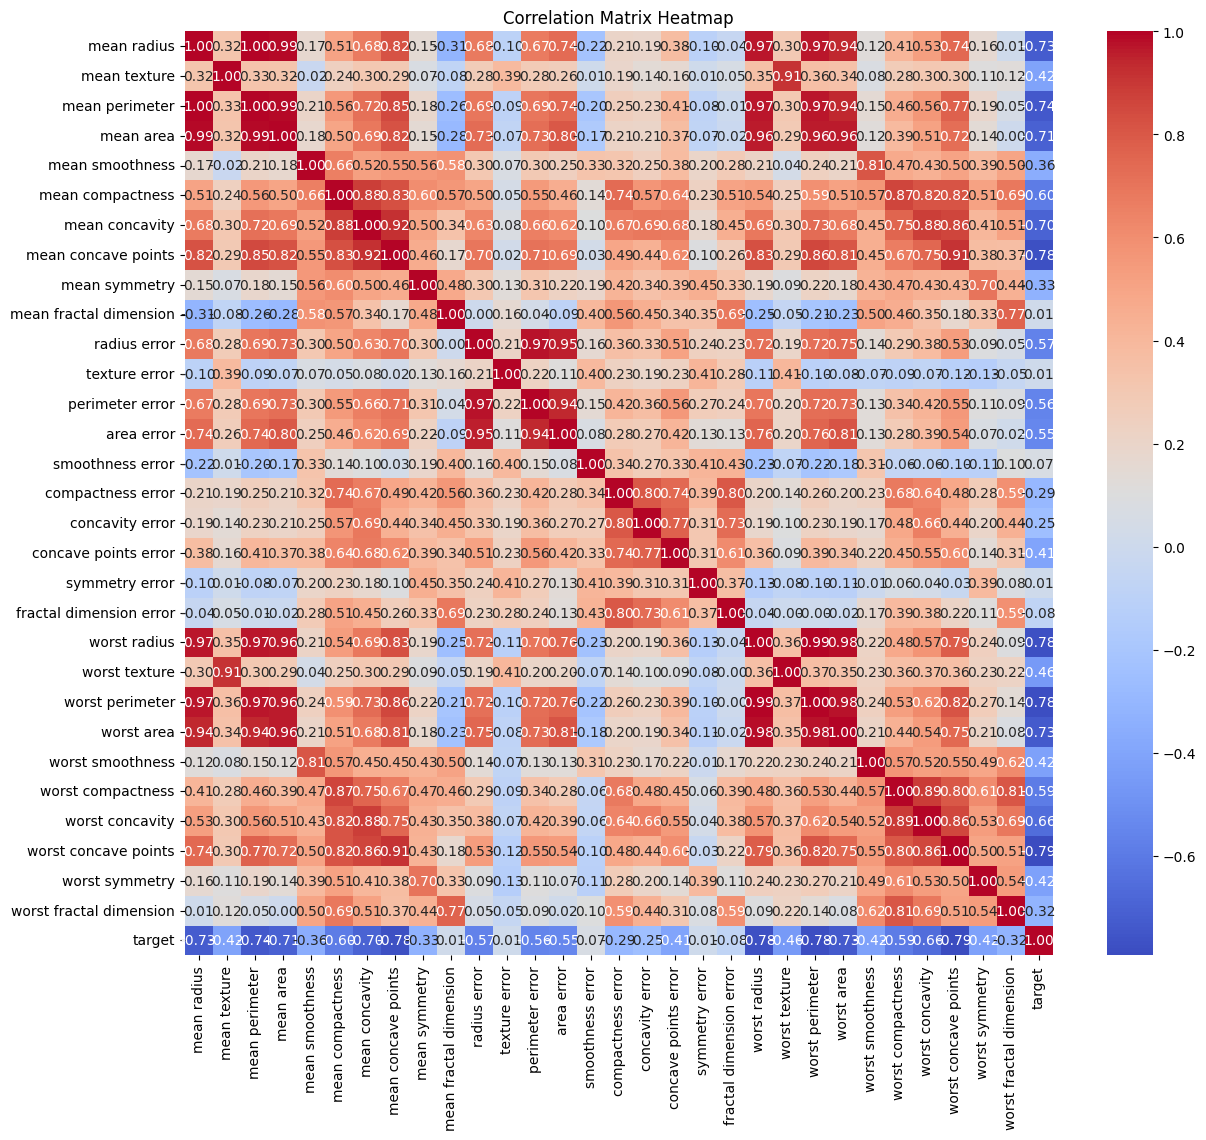

In [19]:
# Heatmap for correlation matrix
plt.figure(figsize=(14, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

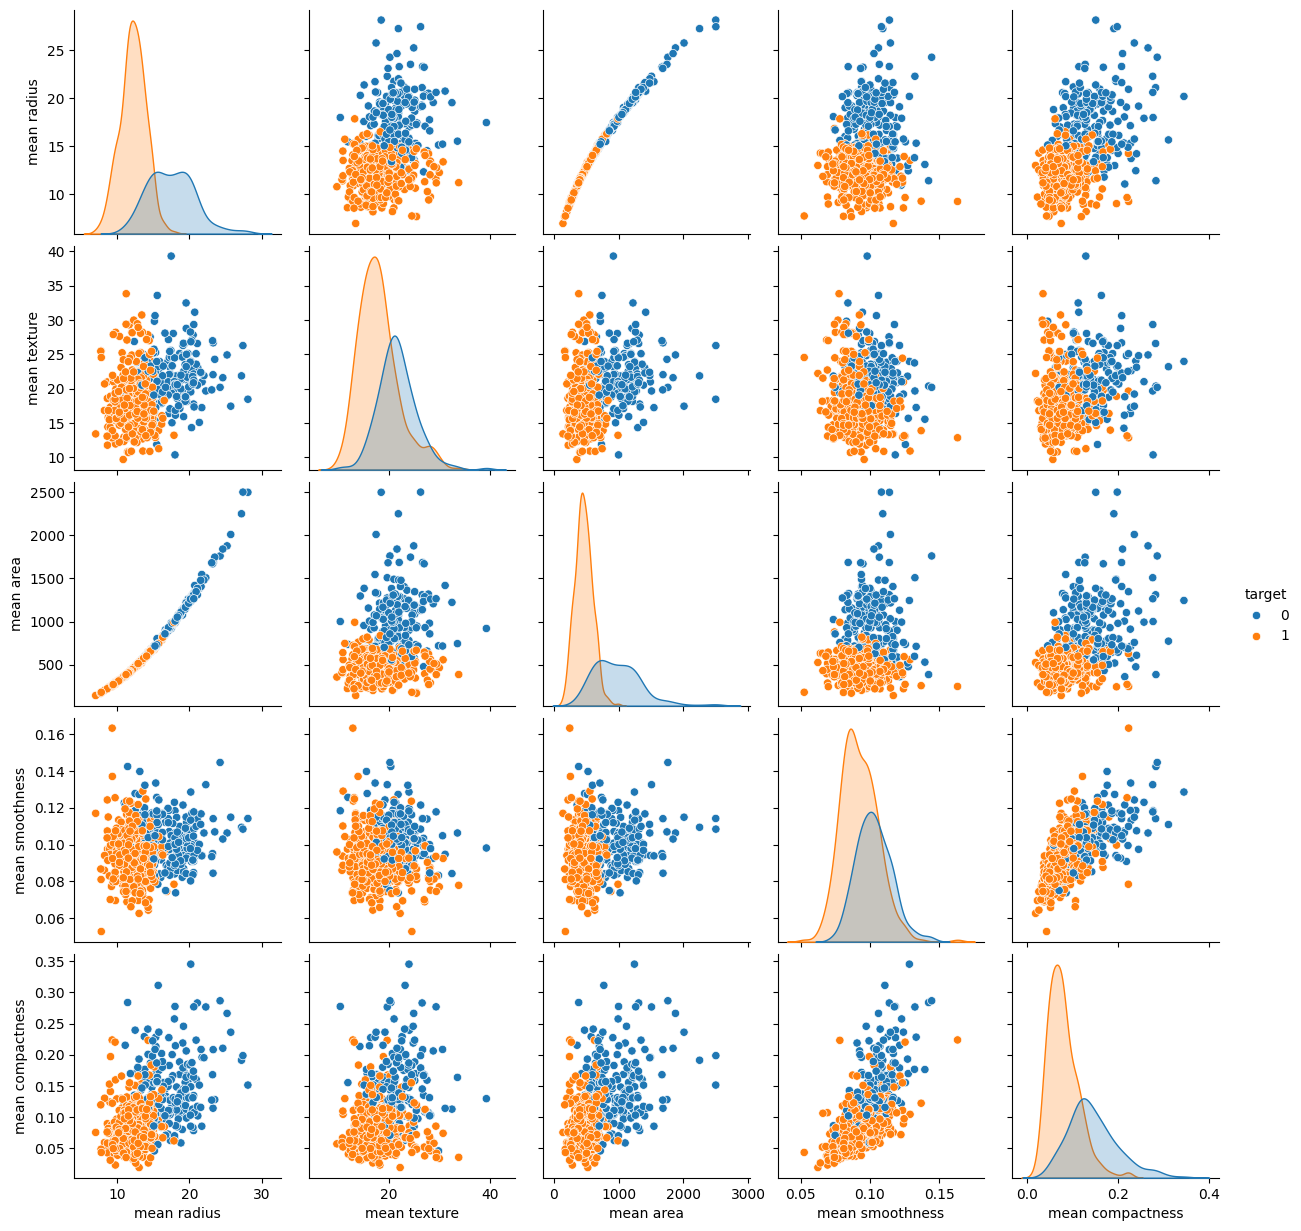

In [20]:
# Pair plots for selected features
selected_features = ['mean radius', 'mean texture', 'mean area', 'mean smoothness', 'mean compactness']
sns.pairplot(df[selected_features + ['target']], hue='target')
plt.show()

## Preparing the Data

In [21]:
X = df.drop('target', axis=1) # features
y = df['target'] # target variable
print(X.shape)
print(y.shape)


(569, 30)
(569,)


# scaling the data

In [22]:
#  scale the data using standardscaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


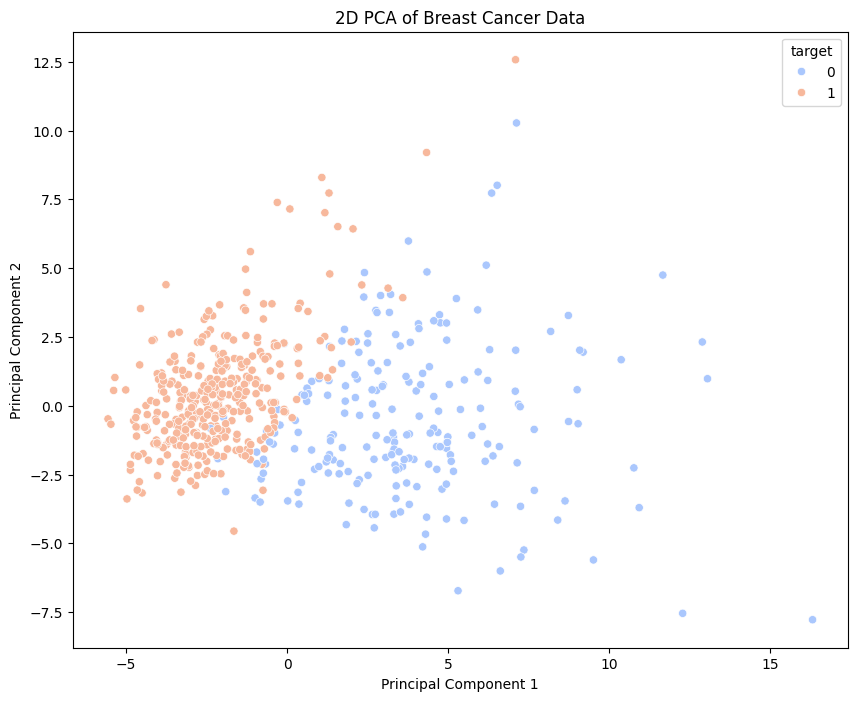

In [23]:
# PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Concatenating the target variable
final_df = pd.concat([principal_df, df[['target']]], axis=1)

# Scatter plot of the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='target', data=final_df, palette='coolwarm')
plt.title('2D PCA of Breast Cancer Data')
plt.show()

# 5. Model Selection, Training & Evaluation

## Splitting the data into Training and Test set

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

print("The shape of X_train =", X_train.shape)
print("The shape of X_test =", X_test.shape)
print("The shape of y_train =", y_train.shape)
print("The shape of y_test =", y_test.shape)

The shape of X_train = (455, 30)
The shape of X_test = (114, 30)
The shape of y_train = (455,)
The shape of y_test = (114,)


## **Logistic Regression**

In [25]:
# Logistic Regression
lr = LogisticRegression()

lr.fit(X_train, y_train) # train the model
y_pred_lr = lr.predict(X_test) # predict the value



In [26]:
accuracy_lr = accuracy_score(y_test, y_pred_lr) # accuracy
precision_lr = precision_score(y_test, y_pred_lr) # precision
recall_lr = recall_score(y_test, y_pred_lr) # recall
f1_lr = f1_score(y_test, y_pred_lr) # f1 score

print("Logistic Regression")
print("Accuracy: ",  accuracy_lr * 100)
print("Precision:", precision_lr * 100)
print("Recall:   ",    recall_lr* 100)
print("F1 Score: ",  f1_lr * 100)

Logistic Regression
Accuracy:  97.36842105263158
Precision: 97.22222222222221
Recall:    98.59154929577466
F1 Score:  97.90209790209789


In [27]:
# confusion matrix for logistic regression
y_pred_lr = lr.predict(X_test)
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix_lr)


Logistic Regression Confusion Matrix:
[[41  2]
 [ 1 70]]


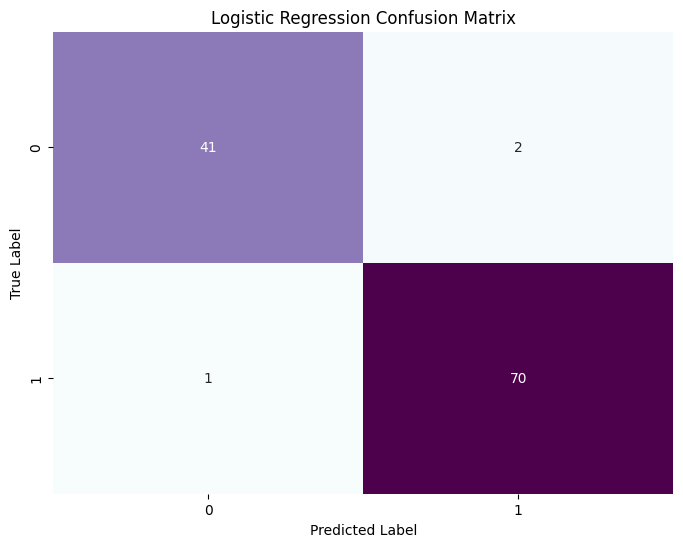

In [28]:
# confusion matrix visualization.
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_lr, annot=True, fmt="d", cmap="BuPu", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


# **Decision Tree**

In [29]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=7, criterion= "entropy", random_state=0)
dt.fit(X_train, y_train) # train the model
y_pred_dt = dt.predict(X_test) # predict the value

In [30]:
accuracy_dt = accuracy_score(y_test, y_pred_dt) # accuracy
precision_dt = precision_score(y_test, y_pred_dt) # precision
recall_dt = recall_score(y_test, y_pred_dt) # recall
f1_dt = f1_score(y_test, y_pred_dt) # f1 score

print("Decision Tree")
print("Accuracy: ",  accuracy_dt * 100)
print("Precision:", precision_dt * 100)
print("Recall:   ",    recall_dt* 100)
print("F1 Score: ",  f1_dt * 100)

Decision Tree
Accuracy:  95.6140350877193
Precision: 94.5945945945946
Recall:    98.59154929577466
F1 Score:  96.55172413793103


In [31]:
# confusion matrix for  Decision Tree
y_pred_dt = dt.predict(X_test)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)


print("Decision Tree Confusion Matrix:")
print(confusion_matrix_dt)


Decision Tree Confusion Matrix:
[[39  4]
 [ 1 70]]


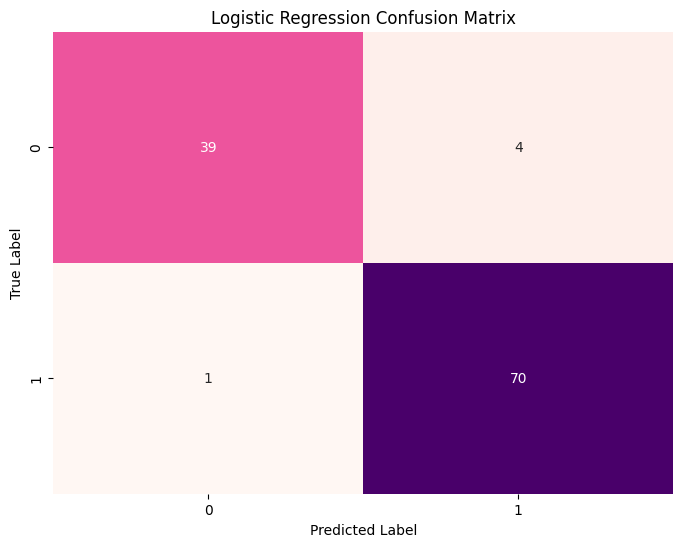

In [32]:
# confusion matrix visualization.
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_dt, annot=True, fmt="d", cmap="RdPu", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# **Support Vector Machine**

In [33]:
# Support Vector Machine
svm = SVC(kernel="linear")
svm.fit(X_train, y_train) # train the model
y_pred_svm = svm.predict(X_test) # predict the value


In [34]:
accuracy_svm = accuracy_score(y_test, y_pred_svm) # accuracy
precision_svm = precision_score(y_test, y_pred_svm) # precision
recall_svm = recall_score(y_test, y_pred_svm) # recall
f1_svm = f1_score(y_test, y_pred_svm) # f1 score

print("Support Vector Machine")
print("Accuracy: ",  accuracy_svm * 100)
print("Precision:", precision_svm * 100)
print("Recall:   ",    recall_svm* 100)
print("F1 Score: ",  f1_svm * 100)

Support Vector Machine
Accuracy:  95.6140350877193
Precision: 97.14285714285714
Recall:    95.77464788732394
F1 Score:  96.45390070921985


In [35]:
#  Confusion matrix for Support Vector Machine
y_pred_svm = svm.predict(X_test)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)


print("Support Vector Machine Confusion Matrix:")
print(confusion_matrix_svm)

Support Vector Machine Confusion Matrix:
[[41  2]
 [ 3 68]]


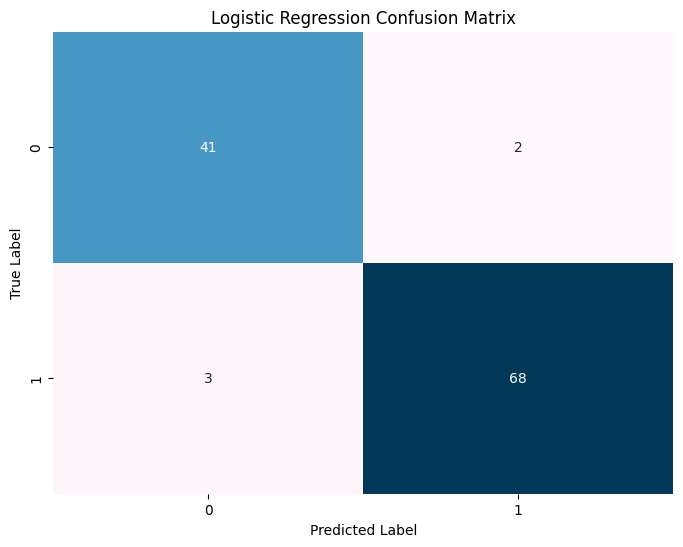

In [36]:
# confusion matrix visualization.
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_svm, annot=True, fmt="d", cmap="PuBu", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# **Random Forest**

In [37]:
# Random Forest
rf = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=0)
rf.fit(X_train, y_train) # train the model
y_pred_rf = rf.predict(X_test) # predict the value


In [38]:
accuracy_rf = accuracy_score(y_test, y_pred_rf) # accuracy
precision_rf = precision_score(y_test, y_pred_rf)  # precision
recall_rf = recall_score(y_test, y_pred_rf) # recall
f1_rf = f1_score(y_test, y_pred_rf) # f1 score

print("Random Forest")
print("Accuracy: ",  accuracy_rf * 100)
print("Precision:", precision_rf * 100)
print("Recall:   ",    recall_rf* 100)
print("F1 Score: ",  f1_rf * 100)

Random Forest
Accuracy:  96.49122807017544
Precision: 95.8904109589041
Recall:    98.59154929577466
F1 Score:  97.22222222222221


In [39]:
#  Confusion matrix for Support Vector Machine
y_pred_rf = rf.predict(X_test)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Confusion Matrix:")
print(confusion_matrix_rf)

Random Forest Confusion Matrix:
[[40  3]
 [ 1 70]]


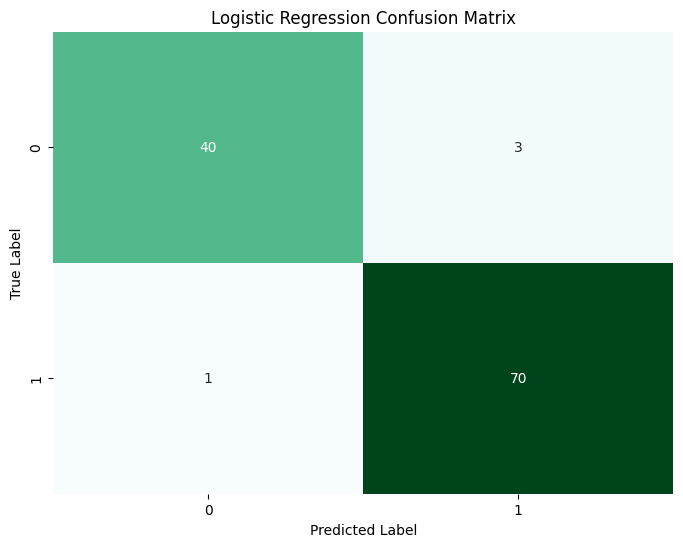

In [40]:
# confusion matrix visualization.
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf, annot=True, fmt="d", cmap="BuGn", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Logistic Regression Confusion Matrix")
plt.show()